# visualgorithm: a sorting machine problem
---
*submitted by Goldy Mariz Lunesa || [@gmlunesa](https://github.com/gmlunesa)*


## O($n^{2}$)  algorithms

Count the number of comparisons (selection vs bubble vs insertion)

- Best case comparison (pre sorted sequences)

- Worst case comparison (reverse sorted sequences)

- Average case comparison (random numbers)

### Selection Sort

Selection sort works by finding the number in the first position of $A'$, $a'_{0}$, which is eqivalent to the smallest number in $A$, min($A$). It then finds the number to be placed in the $a'_{1}$ which is eqivalent to the smallest number in $A$ excluding $a'_{0}$ which is equivalent to min($A$ − [$a'_{0}$]). The next number, $a'_{2}$ ( is equivalent to min($A$ − [$a'_{0}$, $a'_{1}$]). Selection sort does this until the value for $a'_{n}$ is found.


In [668]:
def initArrays():
    with open('on2bestcase.txt') as file_bc:
        bestCaseArray = []
        for line in file_bc:
            bestCaseArray.append(int(line))
        
    with open('on2worstcase.txt') as file_wc:
        worstCaseArray = []
        for line in file_wc:
            worstCaseArray.append(int(line))

    with open('on2avgcase.txt') as file_ac:
        avgCaseArray = []
        for line in file_ac:
            avgCaseArray.append(int(line))
            
    with open('reverse1000.txt') as file_r1000:
        reverse1000 = []
        for line in file_r1000:
            reverse1000.append(int(line))
            
    return bestCaseArray, worstCaseArray, avgCaseArray, reverse1000

In [669]:
dataArrays = initArrays()

def selection_sort(data):
    count = 0
    for index in range(len(data)):
        min = index
        count += 1
        for scan in range(index + 1, len(data)):
            if (data[scan] < data[min]):
                min = scan
        if min != index:
            data[index], data[min] = data[min], data[index]
    return count, data

print("Best Case: %s",  selection_sort(dataArrays[0])[0])
print("Worst Case:  %s", selection_sort(dataArrays[1])[0]) 
print("Average Case: %s", selection_sort(dataArrays[2])[0])

Best Case: %s 300
Worst Case:  %s 300
Average Case: %s 300


---
### Insertion Sort

Insertion sort works by partially sorting the elements of the sequence. It
starts by sorting the first 2 elements of the sequence, inserting the $a '_{1}$ to
the first position if $a '_{1}$ < $a '_{0}$. It then sorts the first 3 elements of the
sequence by inserting $a '_{2}$ to its correct spot in then sorted 2 elements. It
then sorts the first 4 elements by inserting the $a '_{3}$ into its correct spot.
The algorithm does this $n$ − 1 number of times.



In [670]:
dataArrays = initArrays()

# Recursive implementation of insertion sort
def insertion_sort(data):
    count = 0
    for index in range(1, len(data)):
        while 0 < index and data[index] < data[index - 1]:
            count += 1
            data[index], data[
                index - 1] = data[index - 1], data[index]
            index -= 1

    return count, data



print("Best Case: %s" % insertion_sort(dataArrays[0])[0])
print("Worst Case:  %s" % insertion_sort(dataArrays[1])[0]) 
print("Average Case: %s" % insertion_sort(dataArrays[2])[0])

Best Case: 0
Worst Case:  44850
Average Case: 20943


---
### Bubble Sort

Bubble sort works by comparing every pair of adjacent elements, $a_{i}$ and
$a_{i+1}$. If the elements are in the wrong order, (i.e. $a_{i}$ > $a_{i+1}$) the elements
are swapped. The algorithm performs this until all elements are in their
right position.

In [671]:
dataArrays = initArrays()

def bubble_sort(data):
    count = 0
    while True:
        swapped = False
        for index in range(1, len(data)):
            count += 1
            if data[index-1] > data[index]:
                data[index-1], data[index] = data[index], data[index-1]
                swapped = True
        if not swapped:
            break
    return count, data

print("Best Case: %s" % bubble_sort(dataArrays[0])[0])
print("Worst Case:  %s" % bubble_sort(dataArrays[1])[0]) 
print("Average Case: %s" % bubble_sort(dataArrays[2])[0])


Best Case: 299
Worst Case:  89700
Average Case: 83720


## Shell Sort optimization


### Shell Sort

Shell sort is the generalization of either the insertion sort algorithm, (or
the bubble sort algorithm, but almost always, insertion sort is the
chosen subroutine as discussed in the previous section). This algorithm
works by dividing the input sequence into $g$ interleaved subsequences
where each element in the sublist is separated by some gap $g$. The
algorithm individually sorts these subsequences using either insertion
sort or bubble sort. After sorting the subsequence, the procedure
repeats with a reduced value for $g$, decreasing the amount of
subsequences. The algorithm stops after the algorithm is sorted with
$g$ = 1 (normal insertion or bubble sort).

#### Shell Sort with Insertion Sort subroutine

In [672]:
def get_unsortedness(data):
    counter = 0;
    comparisons = 0
    for index in range(1, len(data)):
        counter+=1
        while 0 < index and data[index] < data[index - 1]:
            counter += 1
            index -= 1

    return counter

In [673]:
dataArrays = initArrays()

# In this Shell sort with insertion sort subroutine,
# the gaps are determined by dividing the length of array by 2
# def shell_sort_is(data):
#     comparisons = 0
#     comparisonSumSS = 0
#     swapSumSS = 0
#     gap = len(data) // 2
   
#     while gap > 0:
#         # Subroutine call
#         insertionSortResult = insertion_subroutine(data, gap)
#         comparisonSumSS = comparisonSumSS + insertionSortResult[1]
#         swapSumSS = swapSumSS + insertionSortResult[2]
        
#         gap //= 2
        
#     return data, comparisonSumSS, swapSumSS


def shell_sort(data, gapSequence):
    unsortedness = []
    comparisons = []
    comparisonSumSS = 0
    swapSumSS = 0
   
    for gap in gapSequence:
        unsortedness.append(get_unsortedness(data))
        comparisons.append(comparisonSumSS)
        
        # Subroutine call
        insertionSortResult = insertion_subroutine(data, gap)
        comparisonSumSS = comparisonSumSS + insertionSortResult[1]
        swapSumSS = swapSumSS + insertionSortResult[2]
    
    comparisons.append(comparisonSumSS)
    unsortedness.append(0)
        
    return data, comparisonSumSS, swapSumSS, unsortedness, comparisons

def insertion_subroutine(data, gap):
    comparisons = 0
    comparisonSumIS = 0
    
    swaps = 0
    swapSumIS = 0
    
    for index in range(gap, len(data)):
        comparisons = 0
        swaps = 0;
        
        while 0 < index and data[index] < data[index - gap]:
            comparisons += 1
            # Do the swap!
            data[index], data[
                index - gap] = data[index - gap], data[index]
            swaps += 1
            index -= gap
            
        comparisons += 1
        comparisonSumIS += comparisons
        
        swapSumIS += swaps
       
    return data, comparisonSumIS, swapSumIS


In [674]:

def ranges_init(len):
    i = 0
    arr = []
    while (i < len):
        arr.append(i)
        i += 1
    return arr
    

def test_cases_init():
    dataArrays = initArrays()

    ranges = ranges_init(300)
    presort = []
    reverse = []
    random = []
    
    for r in ranges:
        i = 0
        presort_arr = []
        reverse_arr = []
        random_arr = []
        while (i < r):
            presort_arr.append(dataArrays[0][i])
            reverse_arr.append(dataArrays[1][i])
            random_arr.append(dataArrays[2][i])
            i += 1
            
        presort.append(presort_arr)
        reverse.append(reverse_arr)
        random.append(random_arr)
    
    return presort, reverse, random
            
            
    

In [675]:
# import matplotlib.pyplot as plt

# dataArrays = initArrays()

# def shell_vs_insertion_eval():
#     x_values = ranges_init(300)
    
#     # no. of comparisons
#     shell_y_values = []
#     insertion_y_values = []

#     test_cases = test_cases_init()
#     presorted = test_cases[0]
#     reversedsorted = test_cases[1]
    

#     ## REVERSE SORTED SEQUENCES
#     for case in reversedsorted:
#         result = insertion_sort(case)
#         print(result[0])
#         insertion_y_values.append(result[0])

#     print("anni")
#     plt.plot(x_values, insertion_y_values)

#     presorted = test_cases[1]
#     for case in reversedsorted:
#         # result = shell_sort_shell(case, shell_gap_seq(len(case)))
#         result = shell_sort(case, shell_gap_seq(len(case)))
#         print(result[1])
#         shell_y_values.append(result[1])
        
    

#     plt.plot(x_values, shell_y_values)
#     plt.title("Reverse Sorted Sequences")
#     plt.xlabel('Dataset Size')
#     plt.ylabel('Comparisons')
#     plt.legend(['Insertion Sort','Shell sort'], loc='upper left')
#     plt.show()

#     ## PRESORTED SEQUENCES
# #     insertion_y_values = []
# #     shell_y_values = []
# #     for case in presorted:
# #         result = insertion_sort(case,1)
# #         insertion_y_values.append(result)

# #     plt.plot(x_values, insertion_y_values)

# #     presorted = test_cases[0]
# #     for case in presorted:
# #         result = shell_sort_shell(case)
# #         shell_y_values.append(result[3])

# #     plt.plot(x_values, shell_y_values)
# #     plt.title("Sorted Sequences")
# #     plt.legend(['insertion sort','shell sort'], loc='upper left')
# #     plt.show()


# shell_vs_insertion_eval()

#### Shell Sort with Shell's Gap Sequence

Donald Shell proposed a sequence that follows the formula FLOOR($\frac{N}{2^k}$), published in his paper *A High-Speed Sorting Procedure*, published in 1959. In our test case, the generated sequence is [150, 75, 37, 18, 9, 4, 2, 1].

In [676]:
import math;

dataArrays = initArrays()

def shell_gap_seq(dataLength):
    gap = dataLength
    gapSequence = []
    i = 100;

    while gap > 1:
        gap = math.floor(gap // 2)
        gapSequence.append(gap)
        
    return gapSequence

presortedResultsSSShellGap = shell_sort(dataArrays[0], shell_gap_seq(len(dataArrays[0])));
reverseResultsSSShellGap = shell_sort(dataArrays[1], shell_gap_seq(len(dataArrays[1])));
randomResultsSSShellGap = shell_sort(dataArrays[2], shell_gap_seq(len(dataArrays[2])));

print("Presorted; Comparisons: %s ; Swaps: %s ;" %(presortedResultsSSShellGap[1], presortedResultsSSShellGap[2]))
print("Reverse sorted; Comparisons: %s ; Swaps: %s ;" %(reverseResultsSSShellGap[1], reverseResultsSSShellGap[2]))
print("Random Order; Comparisons: %s ; Swaps: %s ;" %(randomResultsSSShellGap[1], randomResultsSSShellGap[2]))



Presorted; Comparisons: 2104 ; Swaps: 0 ;
Reverse sorted; Comparisons: 8926 ; Swaps: 6822 ;
Random Order; Comparisons: 8795 ; Swaps: 6691 ;


#### Shell's Sort with Ciura's Gap Sequence

Ciura's gap sequence was introduced by Marcin Ciura in his paper entitled *Best Increments for the Average Case of Shellsort* in 2001. However, the general term of the sequence is unknown, as it was experimentally derived. The sequence goes [701, 301, 132, 57, 23, 10, 4, 1]. For our test data that has only 300 elements, we would only use the gap sequence comprised of [/132, 57, 23, 10, 4, 1]. 


In [677]:
dataArrays = initArrays();

def ciura_gap_seq(dataLength):
    ciuraSeq = [701, 301, 132, 57, 23, 10, 4, 1]
    gapSequence = []
    
    for gap in ciuraSeq:
        if gap < dataLength:
            gapSequence.append(gap)
            
    return gapSequence

presortedResultsSSCiuraGap = shell_sort(dataArrays[0], ciura_gap_seq(len(dataArrays[0])));
reverseResultsSSCiuraGap = shell_sort(dataArrays[1], ciura_gap_seq(len(dataArrays[1])));
randomResultsSSCiuraGap = shell_sort(dataArrays[2], ciura_gap_seq(len(dataArrays[2])));

print("Presorted; Comparisons: %s ; Swaps: %s ;" %(presortedResultsSSCiuraGap[1], presortedResultsSSCiuraGap[2]))
print("Reverse sorted; Comparisons: %s ; Swaps: %s ;" %(reverseResultsSSCiuraGap[1], reverseResultsSSCiuraGap[2]))
print("Random Order; Comparisons: %s ; Swaps: %s ;" %(randomResultsSSCiuraGap[1], randomResultsSSCiuraGap[2]))

Presorted; Comparisons: 1573 ; Swaps: 0 ;
Reverse sorted; Comparisons: 8507 ; Swaps: 6934 ;
Random Order; Comparisons: 8866 ; Swaps: 7293 ;


---

### Insertion Sort vs Shell Sort with Insertion Sort Subroutine

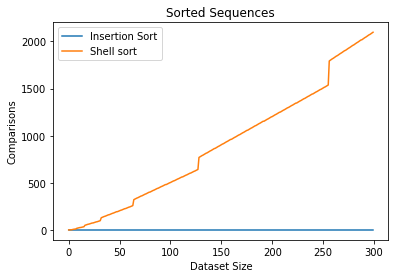

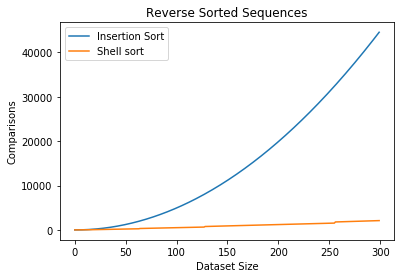

True


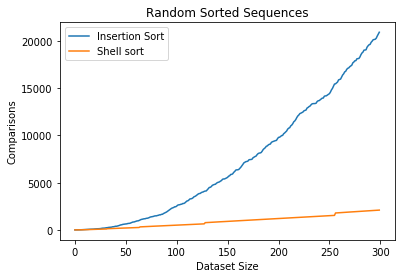

In [678]:
def insertion_vs_shell():
    x_values = ranges_init(300)
    test_cases = test_cases_init()
    
    presorted_is = test_cases[0]
    reversedsorted_is = test_cases[1]
    randomsorted_is = test_cases[2]
    
    presorted_ss = test_cases[0]
    reversedsorted_ss = test_cases[1]
    randomsorted_ss = test_cases[2]
    
    ''' PRESORTED SEQUENCES '''
    shell_y_values = []
    insertion_y_values = []
    
    for case in presorted_is:
        
        result = insertion_sort(case)
        insertion_y_values.append(result[0])

    plt.plot(x_values, insertion_y_values)

    for case in presorted_ss:
        # result = shell_sort_shell(case, shell_gap_seq(len(case)))
        result = shell_sort(case, shell_gap_seq(len(case)))
        shell_y_values.append(result[1])
        
    
    plt.plot(x_values, shell_y_values)
    plt.title("Sorted Sequences")
    
    plt.xlabel('Dataset Size')
    plt.ylabel('Comparisons')
    
    plt.legend(['Insertion Sort','Shell sort'], loc='upper left')
    plt.show()

    ''' REVERSE SORTED SEQUENCES '''
    shell_y_values = []
    insertion_y_values = []
    
    for case in reversedsorted_is:
        result = insertion_sort(case)
        insertion_y_values.append(result[0])

    plt.plot(x_values, insertion_y_values)
    
    for case in reversedsorted_ss:
        # result = shell_sort_shell(case, shell_gap_seq(len(case)))
        result = shell_sort(case, shell_gap_seq(len(case)))
        shell_y_values.append(result[1])
        
    
    plt.plot(x_values, shell_y_values)
    plt.title("Reverse Sorted Sequences")
    
    plt.xlabel('Dataset Size')
    plt.ylabel('Comparisons')
    
    plt.legend(['Insertion Sort','Shell sort'], loc='upper left')
    plt.show()
    
    ''' RANDOM SEQUENCES '''
    shell_y_values = []
    insertion_y_values = []
    
    print(randomsorted_is==randomsorted_ss)
    
    for case in randomsorted_is:
        result = insertion_sort(case)
        insertion_y_values.append(result[0])

    plt.plot(x_values, insertion_y_values)

    
    for case in randomsorted_ss:
        # result = shell_sort_shell(case, shell_gap_seq(len(case)))
        result = shell_sort(case, shell_gap_seq(len(case)))
        shell_y_values.append(result[1])
        
    plt.plot(x_values, shell_y_values)
    plt.title("Random Sorted Sequences")
    
    plt.xlabel('Dataset Size')
    plt.ylabel('Comparisons')
    
    plt.legend(['Insertion Sort','Shell sort'], loc='upper left')
    plt.show()


insertion_vs_shell()

#### Shell Sort using Shell's Gap Sequence vs Ciura's Gap Sequence

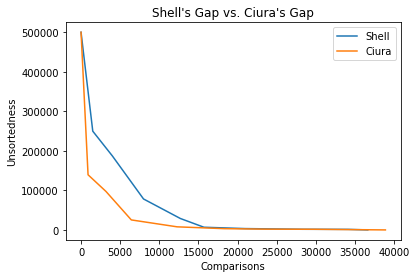

In [679]:
import matplotlib.pyplot as plt

def shell_vs_ciura():

    test_case_shell = initArrays()[3]
    test_case_ciura = initArrays()[3]
    
    comparisons_x_shell = []
    comparisons_x_ciura = []
    
    unsortedness_y_shell = []
    unsortedness_y_ciura = []
    
    #     return data, comparisonSumSS, swapSumSS, unsortedness, comparisons
    
    shell_result = shell_sort(test_case_shell,  shell_gap_seq(len(test_case_shell)))
    comparisons_x_shell = shell_result[4]
    unsortedness_y_shell = shell_result[3]

    ciura_result = shell_sort(test_case_ciura, ciura_gap_seq(len(test_case_ciura)))
    comparisons_x_ciura = ciura_result[4]
    unsortedness_y_ciura = ciura_result[3]


    plt.title("Shell's Gap vs. Ciura's Gap")
    plt.plot(comparisons_x_shell, unsortedness_y_shell)
    plt.plot(comparisons_x_ciura, unsortedness_y_ciura)
    plt.xlabel('Comparisons')
    plt.ylabel('Unsortedness')
        
    plt.legend(['Shell','Ciura'], loc='upper right')
    plt.show()

shell_vs_ciura()

## Bucket Sort

Bucket sort is initialized by preparing a sequence of buckets $B$. These buckets are disjoint sets which are defined by interval values and are arranged according to their interval definitions.

The algorithm works by assigning each element $a_i$ into its corresponding bucket $b_k$. Assignment is based on the bucket definitions, (i.e. $a_i$ is assigned to $a_i$ if $a_i$ ∈ $a_i$). The act of assigning each element to a bucket is akin to approximating its position in the sorted array based on the elements value. After assigning each element to its corresponding bucket, the algorithm then sorts each bucket individually, creating a sorted subsequence $B'_k$ of each bucket $b_k$. The sorted sequence, $A'$ can then be derived as the concatenation of all sorted subsequences, $A'$ = $\sum\limits_{k=0}^{m-1} B_k $

### Bucket Sort across different distributions


In [680]:
def bucket_range(bucket_size, dataset_size):
    int i = 10
    arr = []
    while i < dataset_size:
        ar.append(i)
        i += bucket_size


SyntaxError: invalid syntax (<ipython-input-680-051776ddfbf1>, line 1)

In [ ]:
dataArrays = initArrays();

# def bucket_sort(data):
#     biggest = 0
#     comparisonSumBS = 0
    
#     for number in data:
#         if number > biggest:
#             biggest = number
#     buckets = []
    
#     for i in range ((int(biggest / 10 + 1))):
#         buckets.append([])

#     for number in data:
#         buckets[int(number / 10)].append(number)
        
#     for index, bucket in enumerate(buckets):
#         # Insertion sort as the subroutine
#         insertionSortResult = insertion_subroutine(bucket, 1);
#         buckets[index] = insertionSortResult[0];
#         comparisonSumBS += int(insertionSortResult[1]);
        
#     sorted = [number for number in bucket for bucket in buckets]
#     print(sorted);
#     return sorted, comparisonSumBS

def bucket_sort(data, bucketSize):
    biggest = 0
    comparisonSumBS = 0
    sorted = []
    bucket_distribution = []
    
    for number in data:
        if number > biggest:
            biggest = number
    buckets = []
    
    for i in range ((int(biggest / bucketSize + 1))):
        buckets.append([])
        
    for number in data:
        buckets[int(number / bucketSize)].append(number)
        
    for index, bucket in enumerate(buckets):
        # Using insertion sort to sort individual buckets
        insertionSortResult = insertion_subroutine(bucket, 1);
        buckets[index] = insertionSortResult[0];
        bucket_distribution.append(insertionSortResult[0])
#         print(insertionSortResult[0]);
        
        comparisonSumBS += int(insertionSortResult[1]);
        sorted.extend(buckets[index])
    
    # print (sorted)
    
    return sorted, comparisonSumBS, bucket_distribution

bucket_sort(dataArrays[0], 10)

In [ ]:
import matplotlib.pyplot as plt
def bucket_sort_eval():
    dataArrays = initArrays()
    
    '''BUCKET SORT WITH EQUAL DISTRIBUTIONS'''
    bucket_size = 10
    buckets_x = bucket_range(bucket_size, dataArrays[0])
    bucket_contents_y = bucket_sort(dataArrays[0], bucket_size)[2]
    
    plt.bar(buckets_x, bucket_contents_y)
    

#     plt.bar(y_pos, performance, align='center', alpha=0.5)
#     plt.xticks(y_pos, objects)
#     plt.ylabel('Usage')
#     plt.title('Programming language usage')

#     plt.show()
    


## Radix Sort

Radix sort's algorithm works by sorting the sequence repetitively on each digit. There are two types of radix sort, LSD (least significant digit) and MSD (most significant digit). LSD Radix sort starts sorting at the least significant digit (one's place digit) and MSD Radix sort starts at the most significant digit.

### Counting Sort Subroutine

Counting Sort is the best sorting subroutine to be used for Radix sort. It is a non-comparison sort algorithm that works best when sorting large integer sequences on short ranges.
vfc

In [ ]:
dataArrays = initArrays()

def radix_sort_cs(data):
    accessSum = 0
    # Find the maximum number to know number of digits
    max_radix = max(data)
    
    accessSum = 0;
 
    # Do counting sort for every digit. Note that instead
    # of passing digit number, exp is passed. exp is 10^i
    # where i is current digit number
    exp = 1
    while max_radix/exp > 0:
        cs = counting_sort(data,exp)
        accessSum += counting_sort(data,exp)[1]
        exp *= 10
        
    return data, accessSum

In [ ]:
dataArrays = initArrays()
def counting_sort(data, exp):
    access = 0
    n = len(data)
 
    # Array to store sorted data
    output = [0] * (n)
 
    # Initialize count array as 0
    count = [0] * (10)
 
    # Store count of occurrences in count[]
    for i in range(0, n):
        index = (data[i]/exp)
        count[ int((index)%10) ] += 1
 
    # Change count[i] so that count[i] now contains actual
    #  position of this digit in output array
    for i in range(1,10):
        count[i] += count[i-1]
 
    # Build the output data
    i = n-1
    while i>=0:
        index = (data[i]/exp)
        output[ count[ int((index)%10) ] - 1] = data[i]
        count[ int((index)%10) ] -= 1
        i -= 1
#         access += 1
 
    # Copying the output data to data[],
    # so that data now contains sorted numbers
    i = 0
    for i in range(0,len(data)):
        data[i] = output[i]
        access += 1
    
#     print(access)
    return data, access
        
print(radix_sort_cs(dataArrays[1]))

dataArrays = initArrays()
def radix_sort(data):
    accesses = 0
    RADIX = 10
    max_length = False
    tmp, placement = -1, 1

    while not max_length:
        max_length = True
        buckets = [list() for _ in range(RADIX)]

        for i in data:
            tmp = i / placement
            buckets[int(tmp % RADIX)].append(i)
            if max_length and tmp > 0:
                max_length = False

        a = 0
        for b in range(RADIX):
            bucket = buckets[b]
            for i in bucket:
                data[a] = i
                a += 1
                accesses += 1

        placement *= RADIX
    
    return accesses

print(radix_sort(dataArrays[1]))


### Insertion Sort Subroutine

Radix sort, such as two pass method where counting sort is used during the first pass of each level of recursion, has a large constant overhead. Thus, when the buckets get small, other sorting algorithms should be used, such as **insertion sort**. A good implementation of insertion sort is fast for small arrays, stable, in-place, and can significantly speed up Radix Sort.

In [ ]:
dataArrays = initArrays()

def insertion_subroutine_radix(array, gap, exp, radix):
    accesses = 0
    comparisons = 0
    for i in range(gap, len(array)):
        comparisons += 1
        accesses += 1
        val = array[i]
        j = i
        while j >= gap and array[j - gap] / exp % radix > val  / exp % radix:
            array[j] = array[j - gap]
            j -= gap
            comparisons += 1
            accesses += 1
        array[j] = val

    return accesses

In [ ]:
def radix_sort_is(array, radix):
    accessSum = 0
    if len(array) == 0:
        return array
    
    minValue = min(array)
    maxValue = max(array)

    # lsd
    exponent = 1
    while (maxValue - minValue) / exponent >= 1:
        accessSum += insertion_subroutine_radix(array, 1, exponent, radix)
        
        exponent *= radix

    return array, accessSum

print(radix_sort_is(dataArrays[1], 10))

## Merge Sort

Merge sort works by recursively dividing the sequence into smaller
subsequences until these subsequences are small enough to be sorted
quickly. Merge sort, divides the sequence into two subsequnces until
each subsequence's length is 1.

In [ ]:
dataArrays = initArrays()

def merge_sort(data):
    comparisons = 0
    if len(data) > 1:
        mid = len(data) // 2
        left_half = data[:mid]
        right_half = data[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i, j, k = 0, 0, 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                data[k] = left_half[i]
                i += 1
                comparisons += 1
            else:
                data[k] = right_half[j]
                j += 1
                comparisons += 1
            k += 1

        while i < len(left_half):
            data[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            data[k] = right_half[j]
            j += 1
            k += 1
    
    return data, comparisons


print(merge_sort(dataArrays[0]))

## Quick Sort

Quicksort algorithm is another divide and conquer algorithm that also
recursively divides the sequence into two subsequences. But unlike
merge sort it doesn't divide the algorithm into two equal sized sequnces.
It divides the algorithm based on a pivot element. This pivot element is
selected from the sequence. It rearrages the sequence so that elements
lesser than the pivot is placed to the left of the pivot and elements
greater than the pivot is placed to the right of the pivot. Quicksort is
then recursively called on each of the halves of the sequence (left
subsequence and right subsequence).

In [ ]:
dataArrays = initArrays()

# def quick_sort(alist):
#     comparisons = 0
#     comparisons += quick_sort_helper(alist, 0, len(alist) - 1, comparisons)
#     return comparisons


# def quick_sort_helper(alist, first, last, comparisons):
#     if first < last:
#         returnList = partition(alist, first, last, comparisons)
#         split_point = returnList[0]
#         comparisons += returnList[1]
        
#         comparisons += quick_sort_helper(alist, first, split_point - 1, comparisons)
#         comparisons += quick_sort_helper(alist, split_point + 1, last, comparisons)
#     print(comparisons)
#     return comparisons


# def partition(alist, first, last, comparisons):
#     pivot_value = alist[first]

#     left_mark = first + 1
#     right_mark = last

#     done = False
#     while not done:
#         while left_mark <= right_mark and alist[left_mark] <= pivot_value:
#             left_mark += 1

#         while alist[right_mark] >= pivot_value and right_mark >= left_mark:
#             right_mark -= 1

#         if right_mark < left_mark:
#             done = True
#         else:
#             tmp = alist[left_mark]
#             alist[left_mark] = alist[right_mark]
#             alist[right_mark] = tmp
#             comparisons += 1

#     tmp = alist[first]
#     alist[first] = alist[right_mark]
#     alist[right_mark] = tmp

#     returnList = [right_mark, comparisons]
#     return returnList

def partition(data, start, end):
    comparisonSum = 0
    pos = start
    for i in range(start, end):
        comparisonSum += 1
        if data[i] < data[end]:
            data[i], data[pos] = data[pos], data[i]
            pos += 1
    data[pos], data[end] = data[end], data[pos]
    return pos, comparisonSum

def quick_sort_helper(data, start, end):
    comparisonSum = 0
    if start < end:
        pos, comparisonSum = partition(data, start, end)        
        comparisonSum += quick_sort_helper(data, start, pos - 1)
        comparisonSum += quick_sort_helper(data, pos + 1, end)
    return comparisonSum

def quick_sort(data, start, end):
    if start is None:
        start = 0
    if end is None:
        end = len(data) - 1
    return quick_sort_helper(data, start, end)

print(quick_sort([1, 2, 3, 4, 5, 6, 7, 8, 9], None, None))